# Imports

In [1]:
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import plotly.express as px

# Contents:

1. [Data Description](#Data-Description)
2. [Data Preprocessing](#Data-Preprocessing)
    - [NaN-Cleaning](#NaN-Cleaning)
    - [Outliers detection and Normalization](#Outliers-detection-and-Normalization)
    - [Duplicate data](#Duplicate-data)
    - [Spatial distribution](#Spatial-distribution)

# Data Description

In [2]:
world_metrics_path = "./data/world_metrics.csv"
world_metrics = pd.read_csv(world_metrics_path)

In [3]:
world_metrics

country  life_expect  life_exp60  adult_mortality  infant_mort  \
0          Angola     62.63262    17.34829        237.96940     0.057900   
1         Burundi     60.09811    16.59126        290.18580     0.052420   
2           Benin     61.08568    17.20543        242.37410     0.066690   
3    Burkina Faso     60.32101    15.48575        254.60270     0.055795   
4        Botswana     66.05297    17.42258        249.24130     0.032560   
..            ...          ...         ...              ...          ...   
132   New Zealand     82.24739    25.29202         66.05728     0.003975   
133         Japan     84.16616    26.39402         50.82619     0.001980   
134      Cambodia     69.36723    17.36710        170.49700     0.027600   
135   South Korea     82.66409    25.26966         60.81405     0.002955   
136          Laos     65.79089    16.83024        192.79390     0.051895   

     age1-4mort  alcohol   bmi  basic_water  pop_mils  ...  pf_identity  \
0      0.007520  5.38006  23.3     55.08428     20.82  ...     7.500000   
1      0.006450  3.88586  21.7     60.20415      9.85  ...     5.833333   
2      0.009390  1.46034  23.5     66.32024     10.05  ...    10.000000   
3      0.008635  7.10585  22.2     48.26772     16.46  ...    10.000000   
4      0.002040  5.14197  24.3     89.40444      2.00  ...     4.250000   
..          ...      ...   ...          ...       ...  ...          ...   
132    0.000235  9.01749  28.0    100.00000      4.46  ...     9.250000   
133    0.000195  6.81588  22.7     98.97000    127.25  ...     9.250000   
134    0.001110  3.50125  22.2     76.94537     14.86  ...     8.333333   
135    0.000125  8.68600  23.8     99.67540     49.00  ...     9.250000   
136    0.003990  7.11148  22.9     79.94190      6.65  ...    10.000000   

     pf_score  ef_government  ef_legal  ef_money  ef_trade  ef_regulation  \
0    6.111324       6.496685  2.963635  5.606605  5.264754       5.518500   
1    4.414134       6.115441  3.495487  7.585471  6.110770       6.271879   
2    7.496976       6.182575  3.822761  7.013885  6.026546       6.855929   
3    7.455340       5.405462  3.687657  7.121434  6.604145       7.427554   
4    6.876334       6.702038  5.950516  9.056783  7.679525       7.769777   
..        ...            ...       ...       ...       ...            ...   
132  9.284819       6.476854  8.715280  9.455372  8.635971       9.159782   
133  8.733771       4.535268  7.586987  9.524659  7.495839       8.197000   
134  7.238448       7.897867  4.277907  9.308534  7.324052       7.061529   
135  8.766350       6.826429  6.391154  9.609132  7.569457       7.243194   
136  5.863586       7.840113  5.937201  7.335899  6.830397       6.590033   

     ef_score  hf_score  happiness_score  
0        5.17  5.640662            3.866  
1        5.92  5.167067            2.905  
2        5.98  6.738488            3.484  
3        6.05  6.752670            3.739  
4        7.43  7.153167            3.974  
..        ...       ...              ...  
132      8.49  8.887410            7.334  
133      7.47  8.101885            5.921  
134      7.17  7.204224            3.907  
135      7.53  8.148175            5.835  
136      6.91  6.386793            4.876  

[137 rows x 30 columns]

1. Dataset `world_metrics` contains information on health and life expectancy data, ecological footprint, human freedom scores, and happiness scores for 137 countries in 2016.
2. It provides statistics for 29 different features. The full list of them (+ the corresponding description) is presented below:

| N | feature | description |
|---|---|---|
| 1 | `country` | Country name |
| 2 | `life_expect` | Life expectancy at birth (years) |
| 3 | `life_exp60` | Life expectancy at age 60 (years) |
| 4 | `adult_mortality` | Adult (15 to 60 years) Mortality Rates (per 1000 population) |
| 5 | `infant_mort` | Death rate up to age 1 |
| 6 | `age1-4mort` | Death rate between ages 1 and 4 |
| 7 | `alcohol` | Alcohol consumption per capita (15+, in litres of pure alcohol) |
| 8 | `bmi` | Mean BMI (kg/m^2) (18+, age-standardized estimate) |
| 9 | `basic_water` | Population using at least basic drinking-water services |
| 10 | `pop_mils` | Population (millions) |
| 11 | `development_index` | Human Development Index |
| 12 | `gdp_per_capita` | Gross Domestic Product per capita (dollars) |
| 13 | `eco_footprint` | Use of ecological assets (measured in gha per person) |
| 14 | `biocapacity` | Productivity of ecological assets (measured in gha per person) |
| 15 | `deficit_or_reserve` | Biocapacity Deficit or Reserve (measured in gha per person) |
| 16 | `pf_rol` | Personal Freedom score (Rule of Law) |
| 17 | `pf_ss` | Personal Freedom score (Security and Safety) |
| 18 | `pf_movement` | Personal Freedom score (Movement) |
| 19 | `pf_religion` | Personal Freedom score (Religion) |
| 20 | `pf_expression` | Personal Freedom score (Expression and Information) |
| 21 | `pf_identity` | Personal Freedom score (Identity and Relationships) |
| 22 | `pf_score` | General Personal Freedom score |
| 23 | `ef_government` | Economic Freedom score (Size of Government) |
| 24 | `ef_legal` | Economic Freedom score (Legal System and Property Rights) |
| 25 | `ef_money` | Economic Freedom score (Access to Sound Money) |
| 26 | `ef_trade` | Economic Freedom score (Freedom to Trade Internationally) |
| 27 | `ef_regulation` | Economic Freedom score (Regulation of Credit, Labor, and Business) |
| 28 | `ef_score` | General Economic Freedom score |
| 29 | `hf_score` | General Human Freedom score |
| 30 | `happiness_score` | Ladder score (between 10 (best) and 0 (worst) possible life) |


3. All features (except for countries names) takes the float values.
4. The question of interest: which factors have the most prominent effect on happiness levels.
5. Information about data sources can be found [here](https://www.kaggle.com/code/dariasvasileva/merging-world-metrics-sets/notebook).

However, after this brief dataset introduction we already have a couple of questions:

1. Should we augmentate the dataset with more countries? 
2. Should we augmentate the dataset with more years?

# Data Preprocessing

## NaN-Cleaning

In [5]:
world_metrics.isna().sum()

country               0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol               0
bmi                   0
basic_water           0
pop_mils              0
development_index     0
gdp_per_capita        0
eco_footprint         0
biocapacity           0
deficit_or_reserve    0
pf_rol                0
pf_ss                 0
pf_movement           0
pf_religion           0
pf_expression         0
pf_identity           0
pf_score              0
ef_government         0
ef_legal              0
ef_money              0
ef_trade              0
ef_regulation         0
ef_score              0
hf_score              0
happiness_score       0
dtype: int64

The initial dataset is clean. We do not have any `NaN` values.

## Outliers detection and Normalization 

We need to identify any outliers in the dataset and remove them, as they may have an adverse effect on our analysis or modeling later. However, removing outliers can also affect the statistical properties of the dataset. So, we need to understand the nature of these values better.

Scaling can help to reduce the influence of outliers.

Let us start with visual representation of our features. To identify possible outliers we need to plot scatterplots. We first step is to prepare the dataaet without categorical values (column "country"):

In [6]:
world_metrics_numerical_features = world_metrics.drop(columns=["country"])

Now, let us define a function that will plot scatterplots using a certain dataset as an argument:

In [7]:
def plot_scatterplot(dataset, title=str, title_fontsize=int, ax_fontsize=int,
                     fig_width=int, fig_height=int,
                     nrows=int, ncols=int):
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height))

    if nrows == 1 and ncols == 1:
        axes = [axes]

    for col, ax in zip(dataset.columns, axes.flat):
        ax.scatter(dataset.index, dataset[col], label=col)
        ax.set_xlabel("Index", fontsize=ax_fontsize)
        ax.set_title(col, fontsize=ax_fontsize)
        
        xticks = ax.get_xticks()
        ax.set_xticks(xticks)
        ax.set_xticklabels([int(tick) for tick in xticks], rotation=0)
        ax.grid(True, color='gray', linestyle='--')

    fig.suptitle(title, y=1.0 , fontsize=title_fontsize)

    plt.tight_layout()
    plt.show()

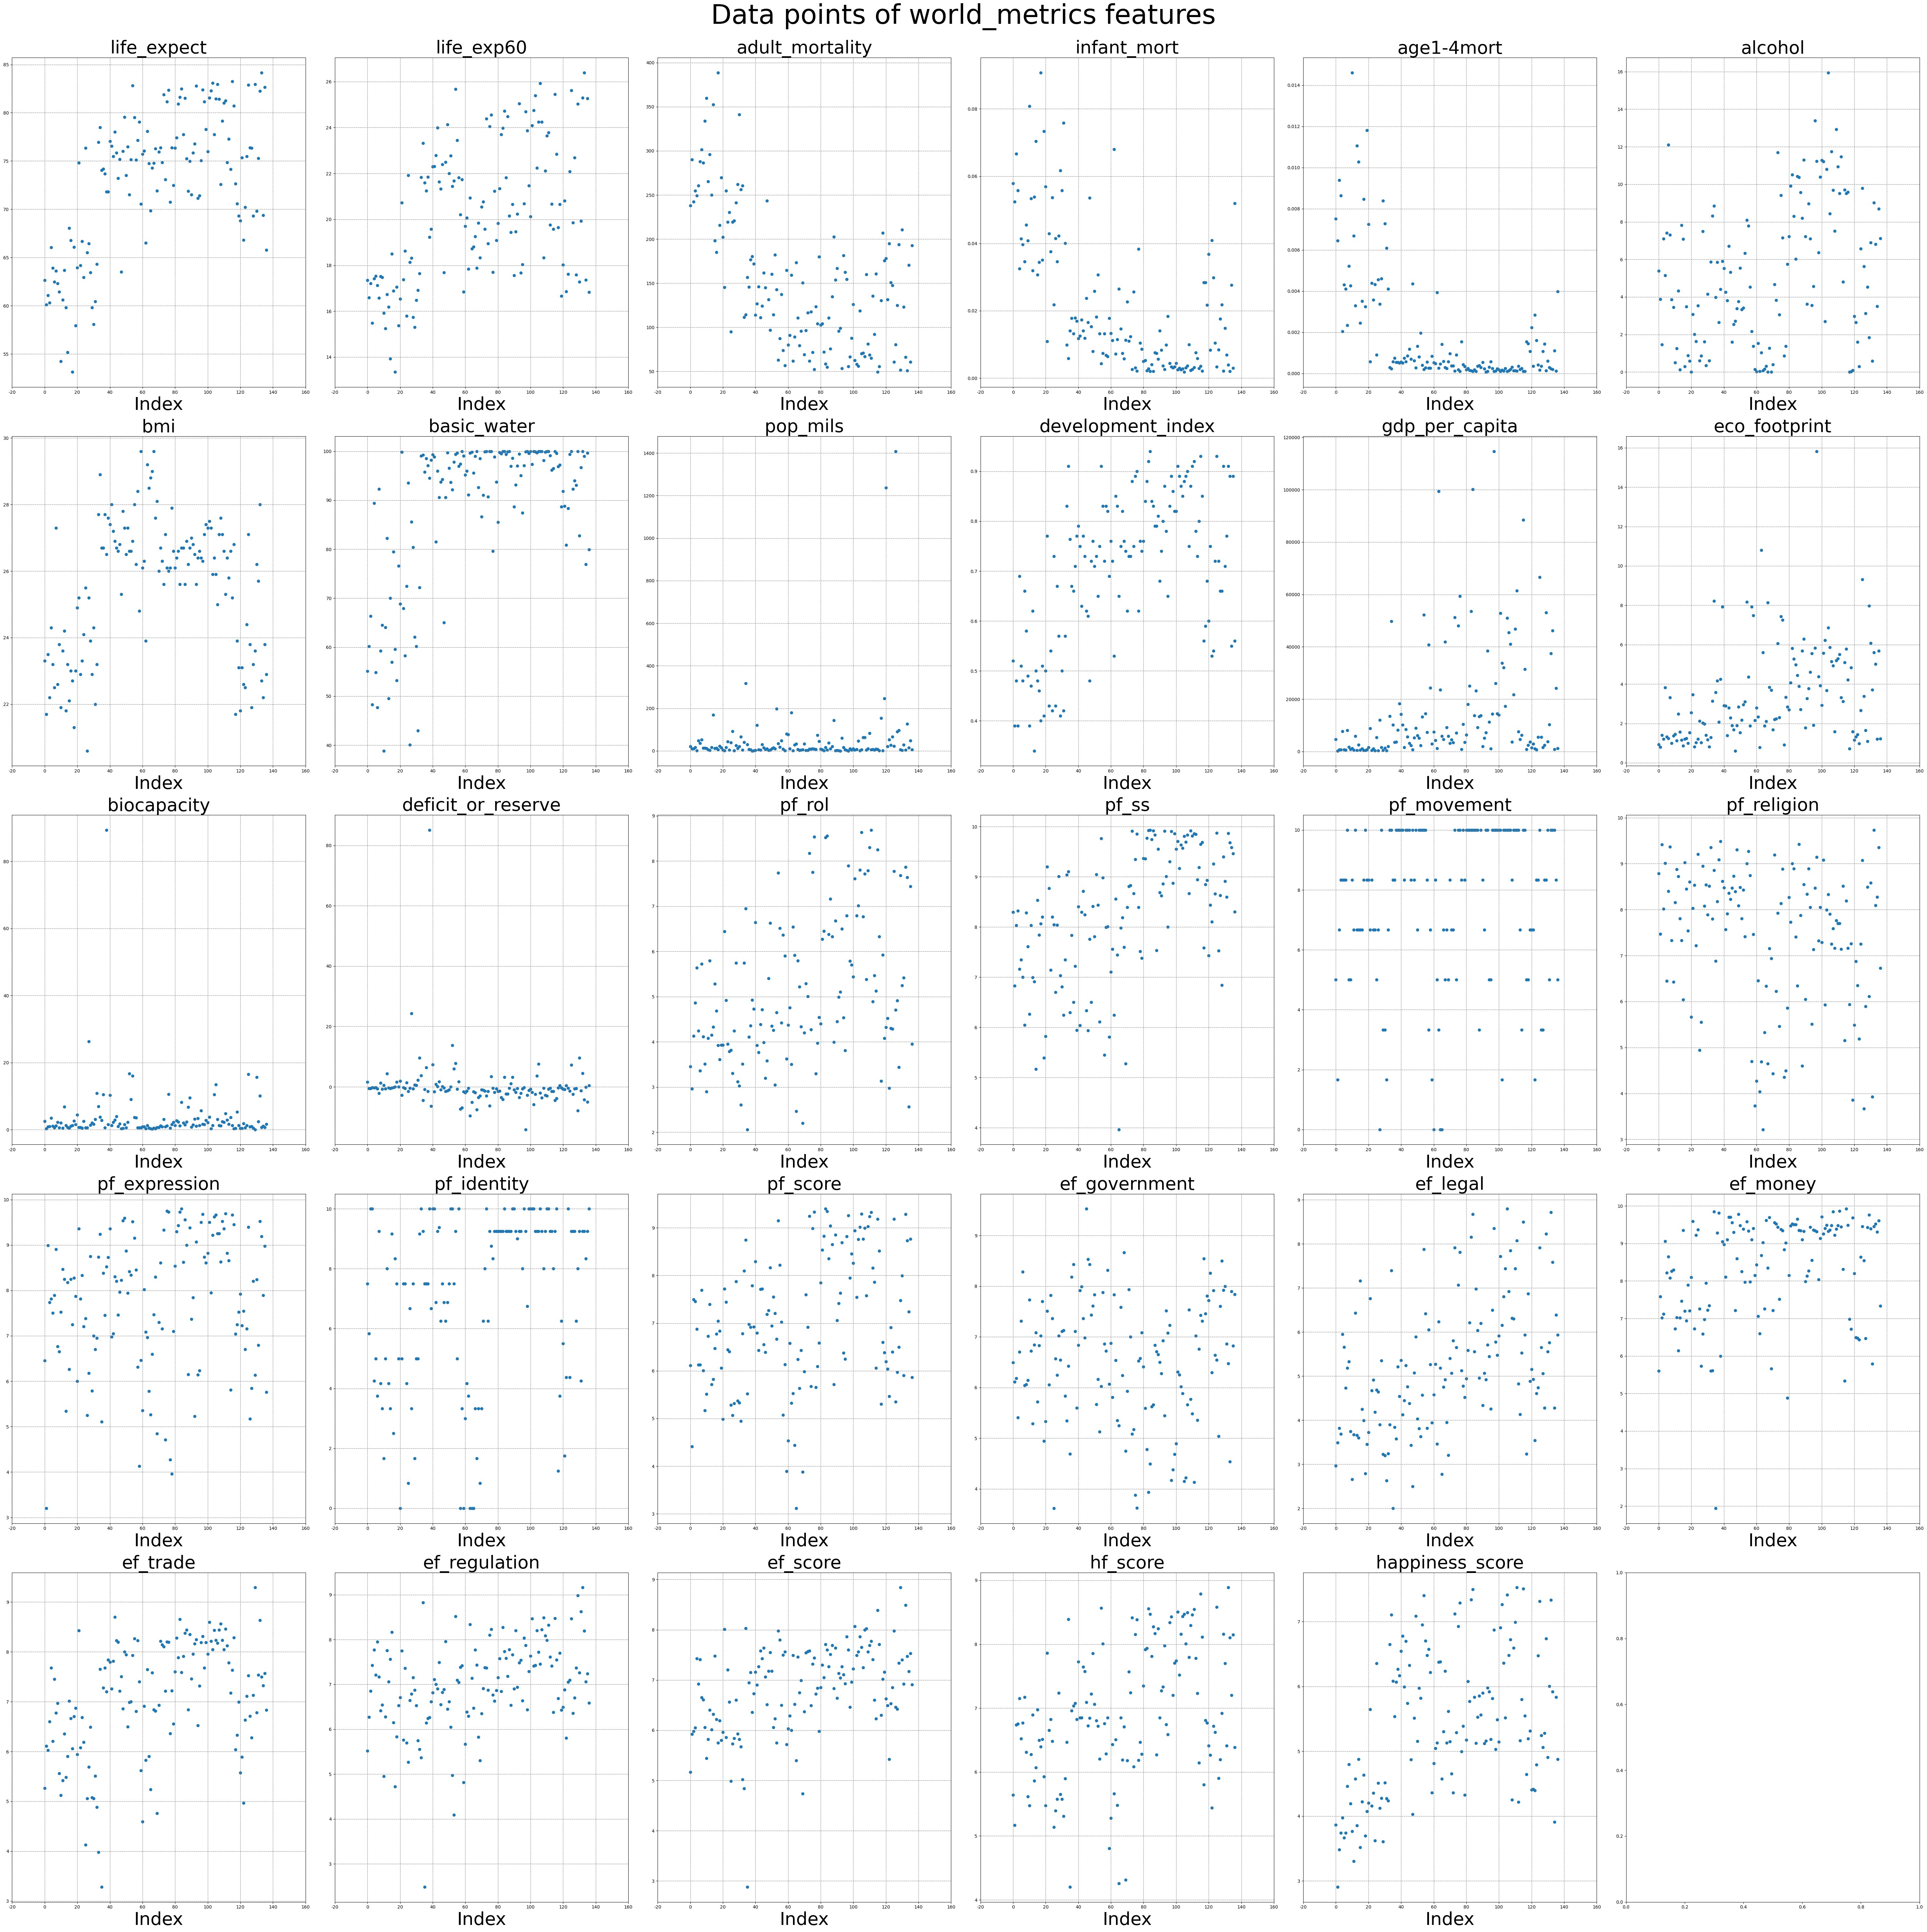

In [8]:
plot_scatterplot(dataset=world_metrics_numerical_features,
                 title="Data points of world_metrics features",
                 title_fontsize=60, ax_fontsize=40,
                 fig_width=60, fig_height=60, nrows=5, ncols=6)

Here are the list of features that have outliers:

- `adult_mortality` (?)
- `infant_mort` (?)
- `age1-4mort` (?)
- `basic_water` (?)
- `pop_mils`
- `gdp_per_capita`
- `eco_footprint`
- `biocapacity`
- `deficit_of_reserve`
- `pf_ss`
- `ef_money`
- `ef_regulation`
- `ef_score`


The description summary is presented below as well.

In [9]:
world_metrics.describe()

life_expect  life_exp60  adult_mortality  infant_mort  age1-4mort  \
count   137.000000  137.000000       137.000000   137.000000  137.000000   
mean     72.962743   20.262010       150.254420     0.021038    0.001848   
std       7.307447    3.026119        78.374564     0.020495    0.002789   
min      53.130500   13.349510        49.201850     0.001790    0.000070   
25%      68.039250   17.609330        87.429160     0.005000    0.000240   
50%      74.843090   20.117140       135.341100     0.013175    0.000545   
75%      77.762060   22.390870       194.952800     0.032560    0.002235   
max      84.166160   26.394020       388.805700     0.090800    0.014615   

          alcohol         bmi  basic_water     pop_mils  development_index  \
count  137.000000  137.000000   137.000000   137.000000         137.000000   
mean     5.167943   25.525547    88.432938    49.495737           0.704919   
std      3.803661    2.064334    15.825358   163.299515           0.155286   
min      0.000910   20.600000    38.852590     0.520000           0.340000   
25%      1.619590   23.800000    82.800580     4.800000           0.590000   
50%      4.538300   26.200000    95.992400    10.880000           0.730000   
75%      8.100000   26.900000    99.586750    36.350000           0.830000   
max     15.950260   29.600000   100.000000  1408.040000           0.940000   

       ...  pf_identity    pf_score  ef_government    ef_legal    ef_money  \
count  ...   137.000000  137.000000     137.000000  137.000000  137.000000   
mean   ...     7.034063    7.054373       6.506282    5.235571    8.352036   
std    ...     2.968634    1.418618       1.225005    1.530037    1.377262   
min    ...     0.000000    3.116028       3.616782    2.002915    1.942101   
25%    ...     5.000000    6.059028       5.664386    4.030095    7.258295   
50%    ...     8.000000    6.920446       6.576430    5.071814    8.971846   
75%    ...     9.250000    8.216035       7.430474    6.158069    9.432830   
max    ...    10.000000    9.398842       9.528485    8.798181    9.922187   

         ef_trade  ef_regulation    ef_score    hf_score  happiness_score  
count  137.000000     137.000000  137.000000  137.000000       137.000000  
mean     7.072647       6.997985    6.832847    6.943610         5.416920  
std      1.156196       1.007888    0.876275    1.044965         1.124471  
min      3.281311       2.483540    2.880000    4.200724         2.905000  
25%      6.355515       6.475280    6.290000    6.274969         4.459000  
50%      7.217833       7.058349    6.950000    6.848010         5.303000  
75%      8.050141       7.632668    7.490000    7.811560         6.324000  
max      9.291177       9.159782    8.840000    8.887410         7.526000  

[8 rows x 29 columns]

## Duplicate data

Redundant data can cause overfitting, that can skew the results later.

## Spatial distribution

Our dataset contains a data for 137 countries and 29 different features. Let us find out what countries do not present.

First, we need to retrieve a list of countries that are in the dataset:

In [10]:
world_metrics_countries = world_metrics['country'].unique()

After that, we need to work with the list `countries_list` that contains all states exist today**. We want to transform it into a dataframe, and mark with Boolean values (i.e. True or False) which countries do we have in the `world_metrics` dataset:

** The list of countries is taken from [here](https://gist.github.com/kalinchernev/486393efcca01623b18d#file-countries) and updated manually.

In [11]:
regions_list = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua & Deps", "Antigua and Barbuda", "Argentina", "Armenia", 
                "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", 
                "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", 
                "Brunei", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Cabo Verde",
                "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Democratic Republic of the Congo", 
                "Congo Republic", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti",
                "Dominica", "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", 
                "Eritrea", "Estonia", "Ethiopia", "Fiji", "Falkland Islands", "Finland", "France", "French Southern and Antarctic Lands", 
                "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guatemala", "Guinea", 
                "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", 
                "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast", "Côte d'Ivoire", "Jamaica", "Japan", "Jordan", 
                "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "North Korea ", "South Korea", "Kosovo", "Kuwait", "Kyrgyz Republic", 
                "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", 
                "Luxembourg", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
                "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", 
                "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", 
                "Nepal", "Netherlands", "New Zealand", "New Caledonia", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", 
                "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", 
                "Portugal", "Puerto Rico", "Qatar", "Romania", "Russia", "Rwanda", "St Kitts & Nevis", "St Lucia", 
                "Saint Vincent & the Grenadines", "Samoa", "San Marino", "Sao Tome & Principe", "Saudi Arabia", 
                "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", 
                "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", 
                "Suriname", "Swaziland", "Sweden", "Switzerland", "Syria", "Syrian Arab Republic", "Taiwan", "Tajikistan", "Tanzania", 
                "Thailand", "Togo", "Tonga", "Trinidad & Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", 
                "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", 
                "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

In [12]:
countries = pd.DataFrame(regions_list, columns=['country'])

countries['is_in_world_metrics'] = countries['country'].isin(world_metrics_countries)
countries.head(5)

country  is_in_world_metrics
0  Afghanistan                False
1      Albania                 True
2      Algeria                 True
3      Andorra                False
4       Angola                 True

Now, we need to use the following piece of code to be able to plot the interactive map:

```python
import plotly.express as px
```

In [13]:
fig = px.choropleth(data_frame=countries,
                    locations="country",
                    locationmode="country names",
                    color="is_in_world_metrics",
                    color_discrete_map={True: "lightgreen", False: "pink"})
fig.show()

From the map above, one can see that the dataset represents data from all over the world, with mostly missing countries from Africa, and middle East. Hence, **our potential results migh be significantly biased since they will not illustrate the relations between different factors and happiness score from under-developed and developing countries**.